# Big Mart Sales - Data Science Project 

### About: 
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet. (Kaggle's Description)

### Motivation:
To analyze about the sales data of a store/mart and search for insightful findings that could potentially help the business grow.

### Steps:
We will extract and understand our dataset to give us some image of what we can analyze and look for. Followed by data cleansing process to clean up the data to smoothen our data analysis. 

### Conclusions:
All findings will be used to make recommendations which potentially could help the business growth.

# Data Understanding

## Import Data

In [1]:
# Import all the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df = pd.read_csv('D:\Data_Science_Project\BigMartSales\Dataset\order_brush_order.csv')
print(df.shape)
df.head()

(8523, 12)


,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


The data consist of 8523 rows and 12 columns

## Data Dictionary
| Variable    | Explanation                                                                                                                       |
|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| ProductID   | Unique product ID |
| Weight   | Weight of product|
| FatContent | Whether the product is low fat or not|
| ProductVisibility    | The % of total display area of all products in a store allocated to the particular product|
| ProductType | The category to which the product belongs|
| MRP   | Maximum Retail Price (list price) of the product|
| OutletID  | Unique store ID|
| EstablishmentYear     | The year in which store was established|
| OutletSize     | The size of the store in terms of ground area covered|
| LocationType     | The type of city in which the store is located|
| OutletType     | Whether the outlet is just a grocery store or some sort of supermarket|
| OutletSales     | Sales of the product in the particular store. This is the outcome variable to be predicted.|

To have a better understanding of our data, we can use functions to get the summary statistics and information regarding the dataset.

In [2]:
# Summary Statistic of dataframe
print("Dataset Summary: ")
print(df.describe())

# Information about the dataframe
print("\n\nDataset Info: ")
df.info()

# Dataset Columns
print("\n\nDataset Columns: ", df.columns)

# Check any missing value
print('\n\nAny Missing Value: ')
print(df.isnull().any())

# Check total missing value
print('\n\nAmount of Missing Values: ')
print(df.isnull().sum())

# Filter and extract rows with missing value
df_null = df[(df['Weight'].isna()) | (df['OutletSize'].isna())]
df_null

Dataset Summary: 
            Weight  ProductVisibility          MRP  EstablishmentYear  \
count  7060.000000        8523.000000  8523.000000        8523.000000   
mean     12.857645           0.066132   140.992782        1997.831867   
std       4.643456           0.051598    62.275067           8.371760   
min       4.555000           0.000000    31.290000        1985.000000   
25%       8.773750           0.026989    93.826500        1987.000000   
50%      12.600000           0.053931   143.012800        1999.000000   
75%      16.850000           0.094585   185.643700        2004.000000   
max      21.350000           0.328391   266.888400        2009.000000   

        OutletSales  
count   8523.000000  
mean    2181.288914  
std     1706.499616  
min       33.290000  
25%      834.247400  
50%     1794.331000  
75%     3101.296400  
max    13086.964800  


Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Pr

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


From 12 columns available, there are 2 columns which have missing values which are 'Weight' and 'OutletSize' columns. We will leave them for now and continue with the data understanding.

In [3]:
# Check categorical columns values
print('Values in FatContent column: ', df['FatContent'].unique())
print('\nValues in ProductType column: ', df['ProductType'].unique())
print('\nValues in OutletSize column: ', df['OutletSize'].unique())
print('\nValues in LocationType column: ', df['LocationType'].unique())
print('\nValues in OutletType column: ', df['OutletType'].unique())

Values in FatContent column:  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Values in ProductType column:  ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Values in OutletSize column:  ['Medium' nan 'High' 'Small']

Values in LocationType column:  ['Tier 1' 'Tier 3' 'Tier 2']

Values in OutletType column:  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Some interesting findings here is that in FatContent column there are inconsistent values such as 'LF', 'low fat' which can be generalize as 'Low Fat', same goes to 'reg'. Also in OutletSize column, we can see that there is a nan value since OutletSize is one of the column that has missing values.

# Data Cleansing

## Fixing invalid entries

In [4]:
# Replace values to keep consistency
df['FatContent'] = df['FatContent'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
print(df['FatContent'].unique())

['Low Fat' 'Regular']


## Rename Column

In [5]:
df.rename({'MRP': 'price'}, axis = 1, inplace = True)
df.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'price', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

## Handling Missing Values

### Visualize Missing Values

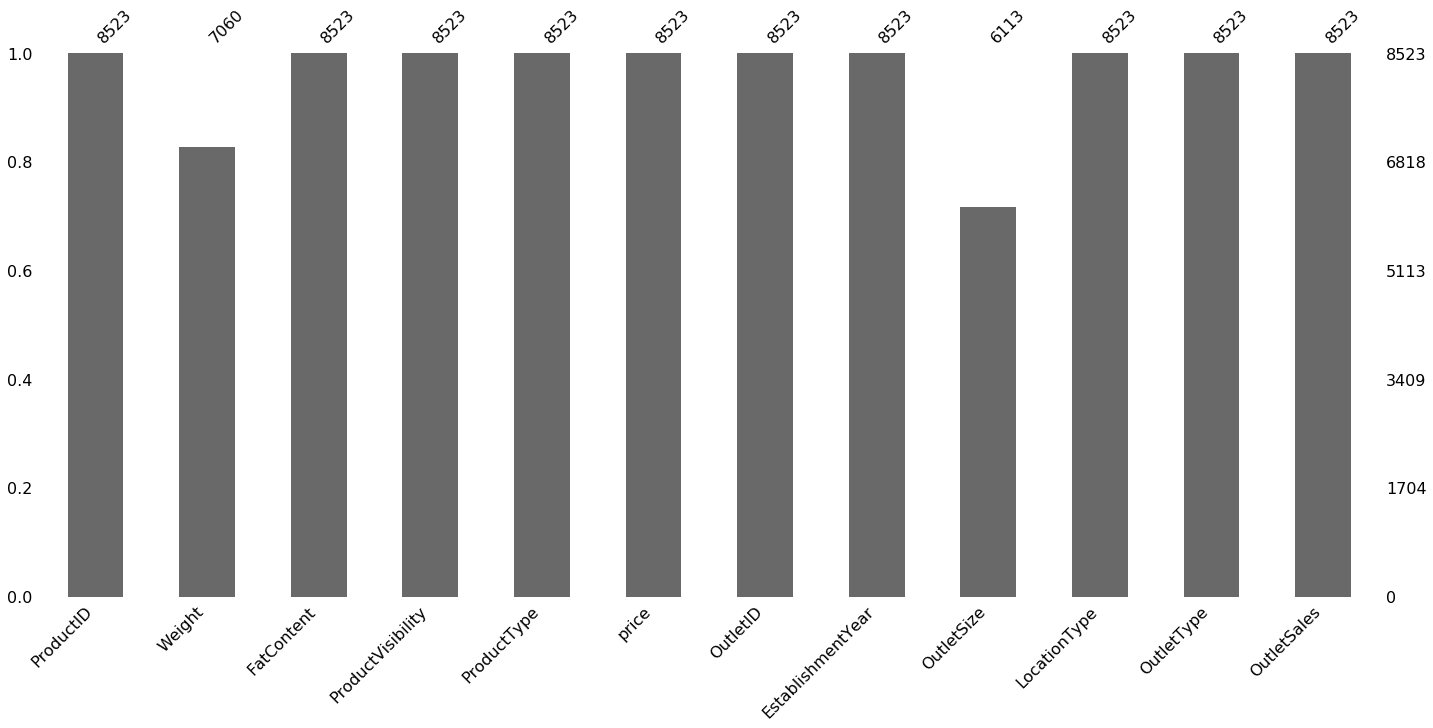

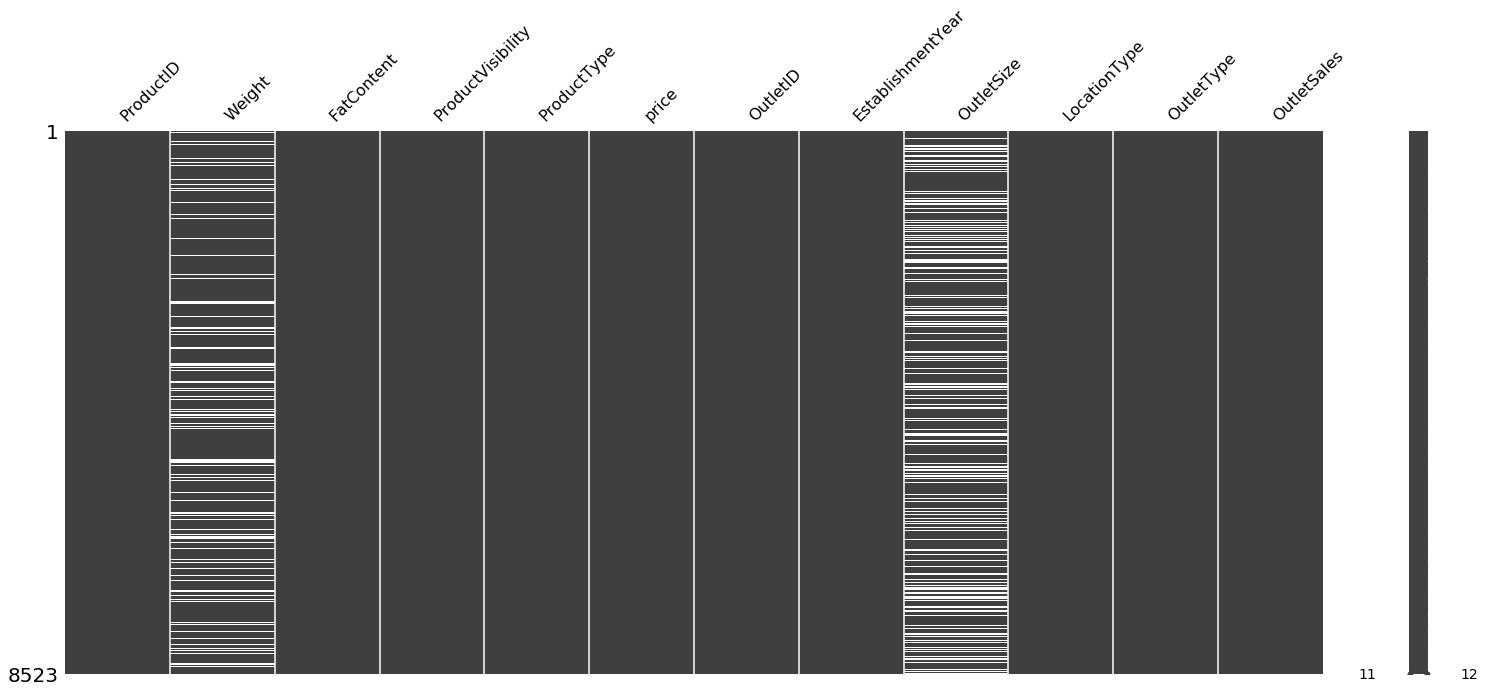

In [6]:
# Visualize missing values distribution
msno.bar(df)
msno.matrix(df)

In [7]:
print("Total of Weight missing values: " + str(df.Weight.isnull().sum()))
print("Total of OutletSize missing values: " + str(df.OutletSize.isnull().sum()))
print("Total data rows: " + str(df.shape[0]))
print("Percentage of Weight missing values: " + str(round(df.Weight.isnull().sum()/df.shape[0], 2) * 100) + "%")
print("Percentage of OutletSize missing values: " + str(round(df.OutletSize.isnull().sum()/df.shape[0], 2) * 100) + "%")

Total of Weight missing values: 1463
Total of OutletSize missing values: 2410
Total data rows: 8523
Percentage of Weight missing values: 17.0%
Percentage of OutletSize missing values: 28.000000000000004%


Based on what we've seen, we should not just drop rows those missing values because if we drop them we will lose many information from the data and it is too risky. Instead we can just try to fill them our way.

In [8]:
outlet_by_type = df.groupby('OutletType')['OutletSize'].unique()
print(outlet_by_type)

OutletType
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object


From above groupby object, we can see that Grocery Store only contains small value for the outlet size, same goes for Supermarket Type 2 and 3, the only contain Medium value. Only Supermarket Type 1 has multiple outlet size which are small, medium and high.

Therefore we will fill the missing values based on the OutletType column value. If its grocery, then we fill with 'small' value, if its supermarket type 2 and 3, then we fill it with medium value. For supermarket type 1, we can fill them in a balanced amount.

### Fill Missing Values

In [9]:
# Fill missing value in weight with total mean
df = df.fillna({'Weight': df['Weight'].mean()})

# Fill missing value in OutletSize based on the various sizes of each category  
iteration = df.shape[0]
count = 0
for i in range(iteration):
    # Check OutletSize value
    if str(df.iloc[i, 8]) == 'nan':
        # Check OutletType Value
        # For Grocery Store
        if df.iloc[i, 10] == 'Grocery Store':
            df.iloc[i, 8] = 'Small'
        # For Supermarket Type1
        elif df.iloc[i, 10] == 'Supermarket Type1':
            # We divide the total rows into 3 parts (33.33%, 66.66%, and 100%).
            # For missing values in rows 0 - 2840, we fill with 'Small'
            if i <= 2840: 
                df.iloc[i, 8] = 'Small'
            # For missing values in rows 2841 - 5681, we fill with 'Medium'
            elif i <= 5681:
                df.iloc[i, 8] = 'Medium'
            # For missing values in rows 5682 - 8522, we fill with 'High'
            elif i <= 8522:
                df.iloc[i, 8] = 'High'
        else: # For Supermarket Type2 and Type3
            df.iloc[i, 8] = 'Medium'
    else: continue
        
print(df.isnull().any())

outlet_by_typeFilled = df.groupby('OutletType')['OutletSize'].unique()
print(outlet_by_typeFilled)
# print(df['Weight'].mean())

ProductID            False
Weight               False
FatContent           False
ProductVisibility    False
ProductType          False
price                False
OutletID             False
EstablishmentYear    False
OutletSize           False
LocationType         False
OutletType           False
OutletSales          False
dtype: bool
OutletType
Grocery Store                      [Small]
Supermarket Type1    [Medium, High, Small]
Supermarket Type2                 [Medium]
Supermarket Type3                 [Medium]
Name: OutletSize, dtype: object


# EDA

We will visualize our data to gain some insight.

In [10]:
def groupby_ins(column_target, by_column):
    groupbyObj = df.groupby(column_target)[by_column].agg(['mean', 'max', 'min'])
    print(groupbyObj.sort_values(by = 'mean', ascending = False))
    plt.rcParams["figure.figsize"] = (20, 12)
    groupbyObj.sort_values(by = 'mean', ascending = False).plot(kind = 'bar')
    plt.xlabel(column_target)
    plt.ylabel(by_column)
    plt.xticks(rotation = 45)
    
def groupby_cat(column_target, by_column):
    groupbyObj = df.groupby(column_target)[by_column].value_counts()
    print(groupbyObj.sort_values(ascending = False))
    plt.rcParams["figure.figsize"] = (20, 12)
    groupbyObj.sort_values(ascending = False).plot(kind = 'bar')
    plt.xlabel(column_target)
    plt.ylabel(by_column)
    plt.xticks(rotation = 45)

df.head(3)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,price,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [11]:
df_hh = df[df.ProductType == 'Household']
df_hh

,ProductID,Weight,FatContent,ProductVisibility,ProductType,price,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
22,NCB30,14.600000,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.000000,Low Fat,0.099887,Household,45.9060,OUT017,2007,Small,Tier 2,Supermarket Type1,838.9080
54,NCP18,12.150000,Low Fat,0.028760,Household,151.4708,OUT017,2007,Small,Tier 2,Supermarket Type1,4815.0656
56,NCX54,9.195000,Low Fat,0.048157,Household,106.1622,OUT045,2002,Small,Tier 2,Supermarket Type1,2117.2440
74,NCZ18,7.825000,Low Fat,0.186357,Household,254.3698,OUT049,1999,Medium,Tier 1,Supermarket Type1,5580.7356
83,NCL18,12.857645,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
98,NCP18,12.857645,Low Fat,0.028460,Household,149.9708,OUT027,1985,Medium,Tier 3,Supermarket Type3,4363.6532
120,NCF19,13.000000,Low Fat,0.035307,Household,47.5034,OUT017,2007,Small,Tier 2,Supermarket Type1,680.4476
129,NCP30,20.500000,Low Fat,0.032835,Household,40.2822,OUT045,2002,Small,Tier 2,Supermarket Type1,707.0796


### Price by Product Type

                             mean       max      min
ProductType                                         
Household              149.424753  264.7910  32.4558
Dairy                  148.499208  266.6884  33.4874
Starchy Foods          147.838023  263.0252  34.0532
Snack Foods            146.194934  264.9568  32.3558
Fruits and Vegetables  144.581235  264.2252  36.2506
Seafood                141.841719  240.2880  33.7216
Breakfast              141.788151  234.9300  40.0480
Breads                 140.952669  263.6594  31.9558
Meat                   139.882032  261.5936  34.7532
Canned                 139.763832  266.8884  36.3506
Frozen Foods           138.503366  264.8910  31.9558
Hard Drinks            137.077928  261.4278  34.2532
Others                 132.851430  254.9040  35.0190
Soft Drinks            131.492506  263.5910  31.2900
Health and Hygiene     130.818921  266.6884  33.1216
Baking Goods           126.380766  265.5568  33.9874


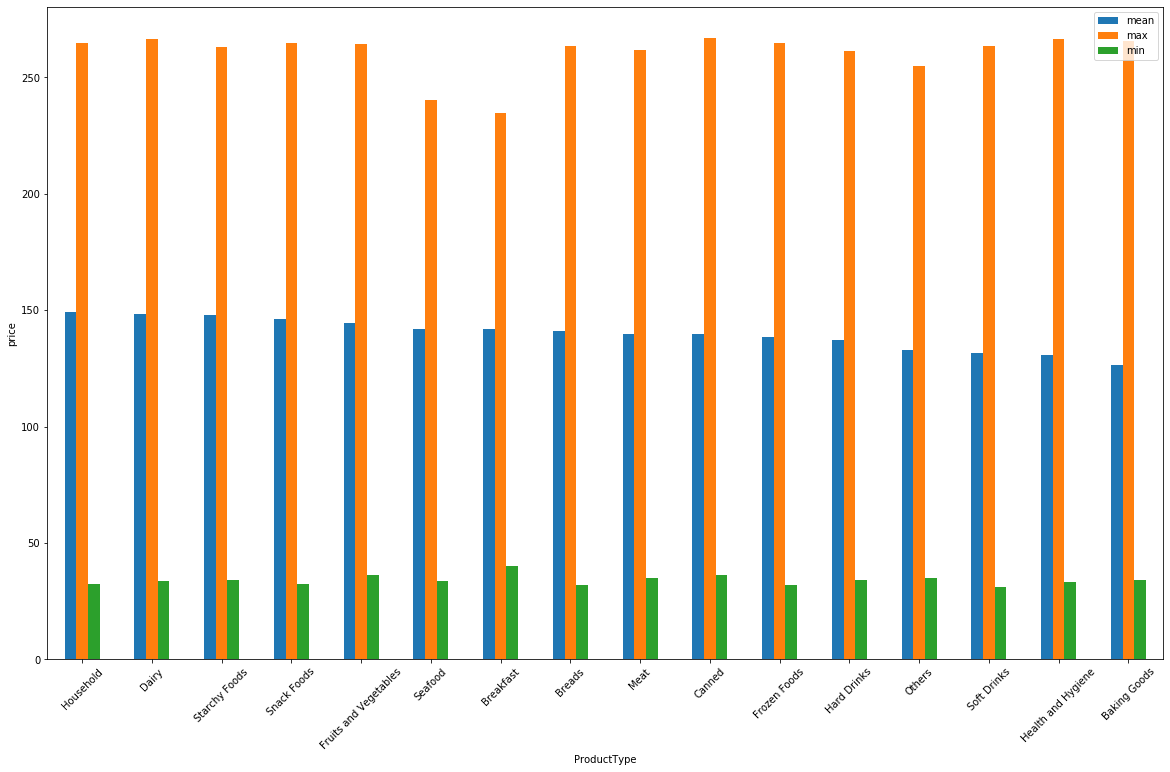

In [12]:
groupby_ins(column_target = 'ProductType', by_column = 'price')

We can see from the chart above that the mean prices from all product type ranges between 126 - 150 pounds with Household product has the highest mean price compared to the others.

### Price by FatContent

                  mean       max      min
FatContent                               
Regular     141.504259  266.8884  32.0558
Low Fat     140.714098  266.8884  31.2900


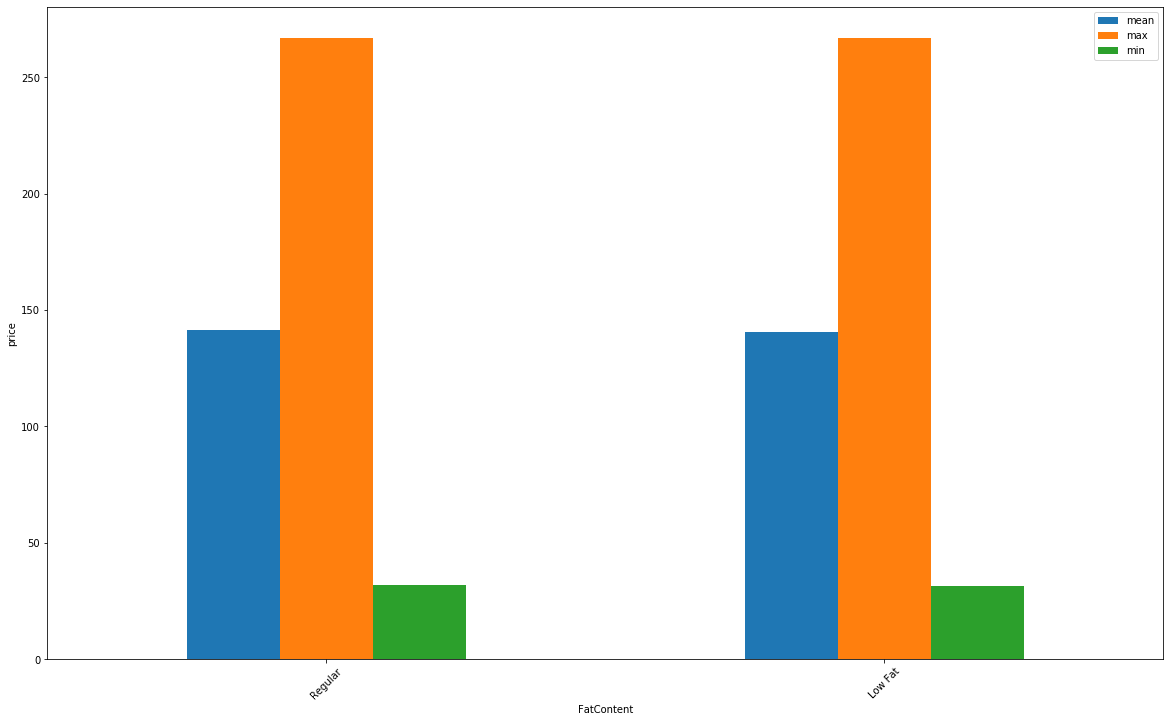

In [13]:
groupby_ins(column_target = 'FatContent', by_column = 'price')

It seems that the prices are not really affected by the fat content of a product.

### Weight by FatContent

                 mean    max    min
FatContent                         
Low Fat     12.923642  21.35  4.590
Regular     12.736520  21.20  4.555


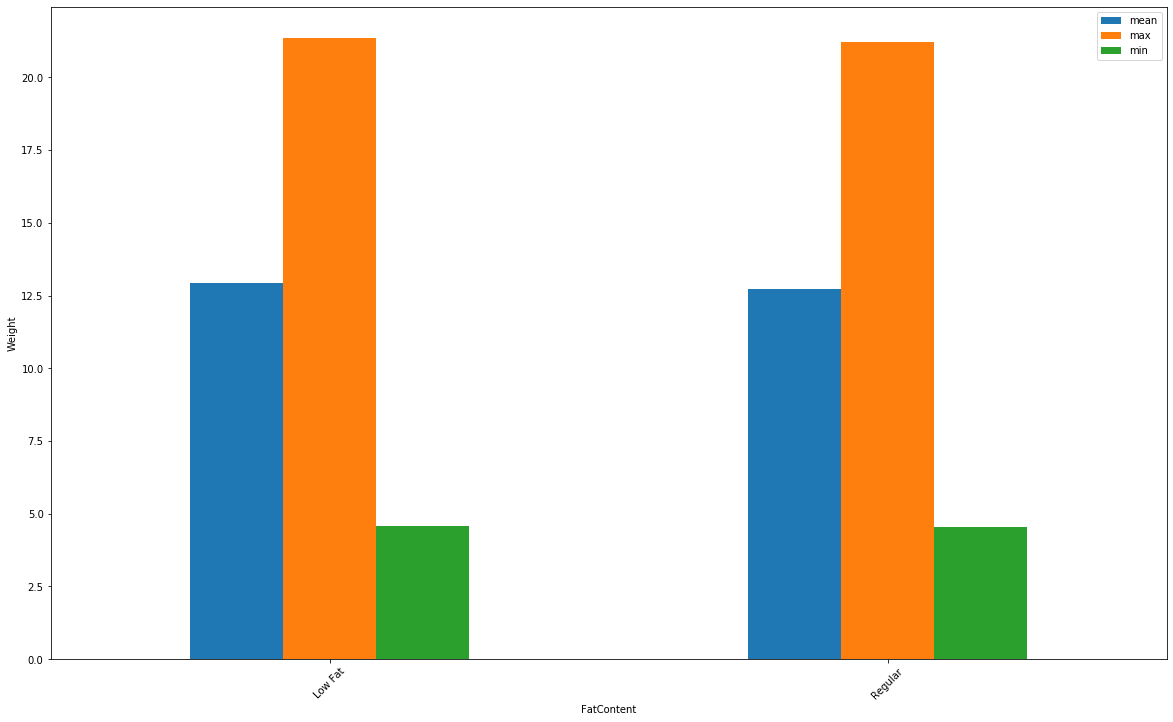

In [14]:
groupby_ins(column_target = 'FatContent', by_column = 'Weight')

From the graph above, the weight of a product is not really affected by the fat content of a product.

### Number of Outlet by type and size

OutletType         OutletSize
Supermarket Type1  Small         2499
                   Medium        1556
                   High          1522
Grocery Store      Small         1083
Supermarket Type3  Medium         935
Supermarket Type2  Medium         928
Name: OutletSize, dtype: int64


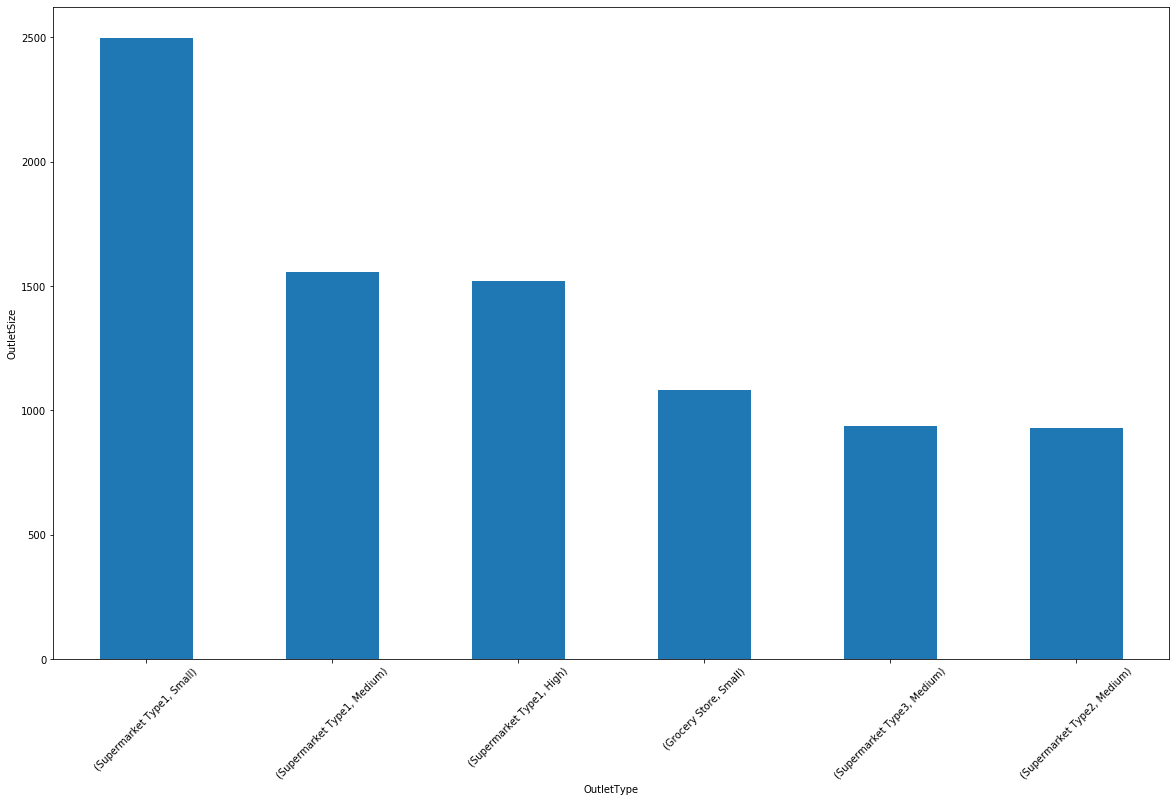

In [15]:
groupby_cat(column_target = 'OutletType', by_column = 'OutletSize')

Supermarket Type1 does top the chart in terms of outlet count let it be small, medium or high outlet size. Then followed by grocery store, Supermarket Type3 and Supermarket Type2.

LocationType  OutletType       
Tier 2        Supermarket Type1    2785
Tier 1        Supermarket Type1    1860
Tier 3        Supermarket Type3     935
              Supermarket Type1     932
              Supermarket Type2     928
              Grocery Store         555
Tier 1        Grocery Store         528
Name: OutletType, dtype: int64


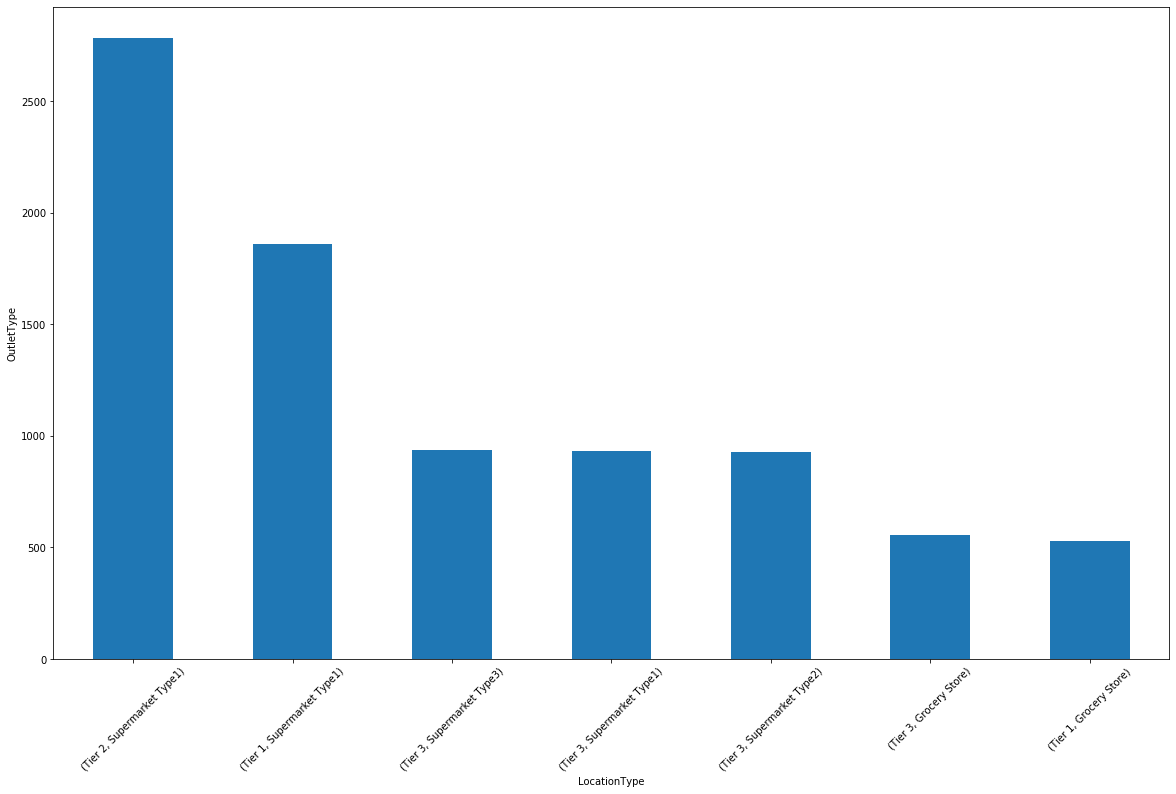

In [16]:
groupby_cat(column_target = 'LocationType', by_column = 'OutletType')

Supermarket Type1 outlets are available in tier 1, tier 2 and tier 3 city. As for grocery store, they are available in tier 1 and tier 3 city and for the Type2 and Type3 Supermarket, they are only available on Tier 3 city.

# Findings

Let's try to lay out some potential business questions that we can try to answer from analysis.
- 🗺️ Which outlet type has the most profit?
- 📊 What are the 3 lowest product type in term of product visibility?
- 🔎 Which product type has the highest sales?
- 🗺️ Does location type and outlet size affect an outlet's sales?
- 📊 Which one sells better between Low and Regular fat product?
- 🔎 At what year the outlet was established??

### 🗺️ Which outlet type has the most profit?

In [17]:
df_gb1_sum = df.groupby('OutletType')['OutletSales'].sum()
df_gb1_mean = df.groupby('OutletType')['OutletSales'].mean()
df_outlet_count = df.OutletType.value_counts()
print('Total outlet per type: ')
print(df_outlet_count)
print('\n')
print('Total sales per outlet type: ')
print(df_gb1_sum.sort_values(ascending = False))
print('\n')
print('Average sales per outlet type: ')
print(df_gb1_mean.sort_values(ascending = False))

Total outlet per type: 
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: OutletType, dtype: int64


Total sales per outlet type: 
OutletType
Supermarket Type1    1.291734e+07
Supermarket Type3    3.453926e+06
Supermarket Type2    1.851823e+06
Grocery Store        3.680343e+05
Name: OutletSales, dtype: float64


Average sales per outlet type: 
OutletType
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: OutletSales, dtype: float64


From the observation above, in terms of total sales from all outlet, Supermarket Type1 top the list with total sales above 12 million pounds. 

But in terms of performance per outlet, it seems that Supermarket Type 3 does have the highest average sales per outlet.

Supermarket Type 2 has the lowest total and average sales compared to the other supermarket type. 

Meanwhile grocery store has the lowest total and average sales but nothing seems out of the ordinary as grocery store are typically smaller/simpler than a supermarket.

### 📊 What are the 3 lowest product type in term of product visibility?

In [18]:
df_prod_vis = df.groupby('ProductType')['ProductVisibility'].mean()
print(df_prod_vis.sort_values())

ProductType
Health and Hygiene       0.055216
Others                   0.060241
Household                0.061322
Meat                     0.062284
Soft Drinks              0.063972
Hard Drinks              0.064943
Frozen Foods             0.065645
Breads                   0.066255
Snack Foods              0.066850
Starchy Foods            0.067564
Canned                   0.068129
Fruits and Vegetables    0.068513
Baking Goods             0.069169
Dairy                    0.072427
Seafood                  0.074976
Breakfast                0.085723
Name: ProductVisibility, dtype: float64


We can see that Health and Hygiene, Others and Household products has the lowest product visibility in an outlet. The other 13 product type are basically F&B product. It might seem normal since usually in a supermarket or grocery store, we can find that many sections are basically F&B products and it might be hard to not see them when we go to those stores.

### 🔎 Which product type has the highest sales?

                                sum         mean
ProductType                                     
Fruits and Vegetables  2.820060e+06  2289.009592
Snack Foods            2.732786e+06  2277.321739
Household              2.055494e+06  2258.784300
Frozen Foods           1.825735e+06  2132.867744
Dairy                  1.522594e+06  2232.542597
Canned                 1.444151e+06  2225.194904
Baking Goods           1.265525e+06  1952.971207
Health and Hygiene     1.045200e+06  2010.000265
Meat                   9.175656e+05  2158.977911
Soft Drinks            8.928977e+05  2006.511735
Breads                 5.532372e+05  2204.132226
Hard Drinks            4.577934e+05  2139.221622
Starchy Foods          3.514013e+05  2374.332773
Others                 3.255176e+05  1926.139702
Breakfast              2.322990e+05  2111.808651
Seafood                1.488682e+05  2326.065928


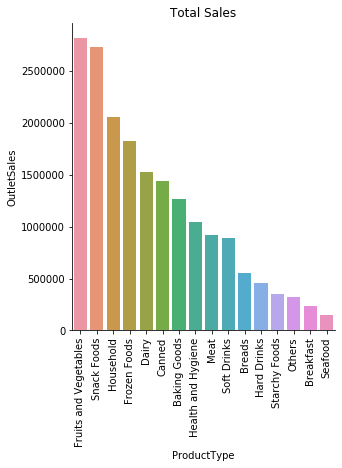

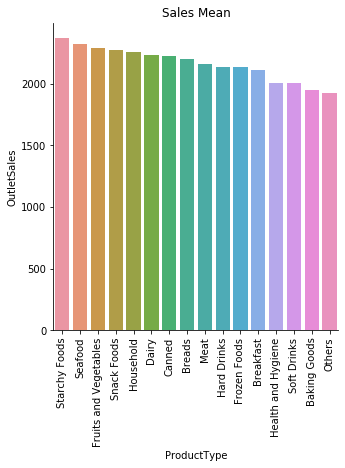

In [19]:
df_prod_sales = df.groupby('ProductType')['OutletSales'].agg(['sum', 'mean'])
print(df_prod_sales.sort_values(by = 'sum', ascending = False))

df_prod_sales_sum = df.groupby('ProductType')['OutletSales'].sum().reset_index().sort_values(by = 'OutletSales', ascending = False)
df_prod_sales_mean = df.groupby('ProductType')['OutletSales'].mean().reset_index().sort_values(by = 'OutletSales', ascending = False)

sns.catplot(x = 'ProductType', y = 'OutletSales', data = df, kind = 'bar', estimator = sum, ci = None, order = df_prod_sales_sum['ProductType'])
plt.title('Total Sales')
plt.xticks(rotation = 90)
plt.show()

sns.catplot(x = 'ProductType', y = 'OutletSales', data = df, kind = 'bar', estimator = np.mean, ci = None, order = df_prod_sales_mean['ProductType'])
plt.title('Sales Mean')
plt.xticks(rotation = 90)
plt.show()

### Amount of product sold

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: ProductType, dtype: int64


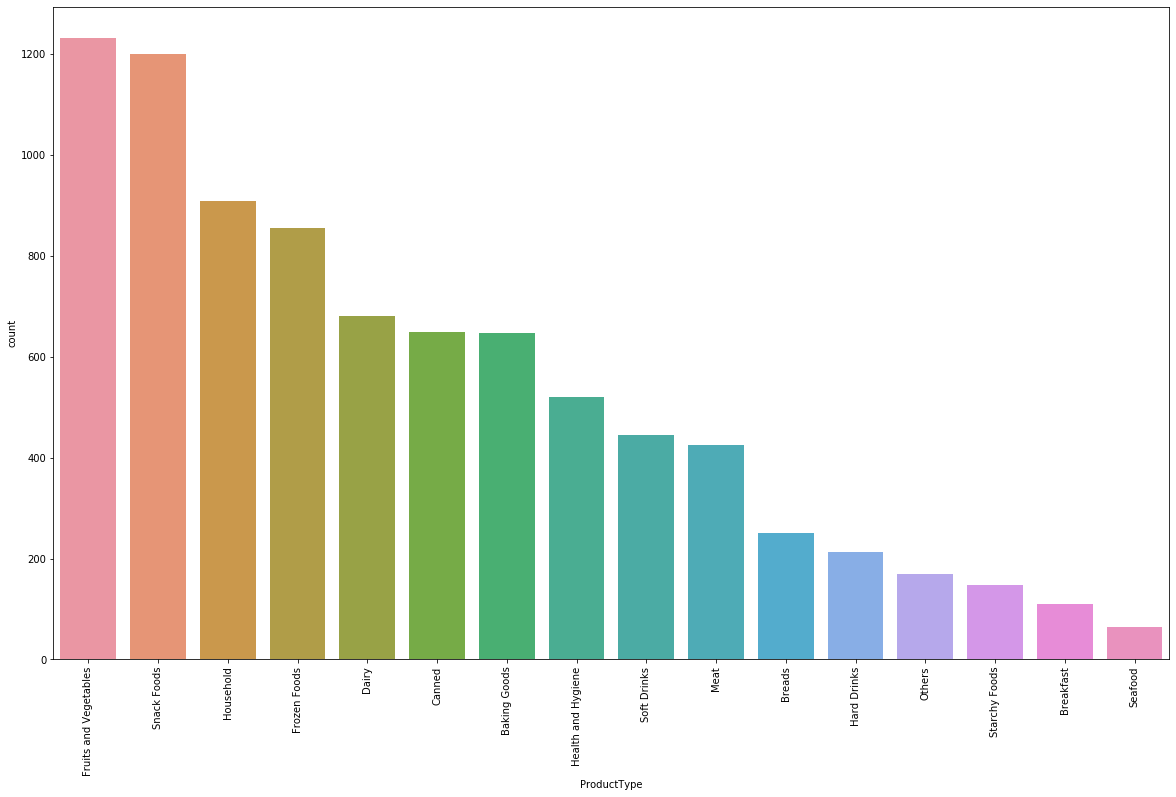

In [20]:
df_prod_count = df['ProductType'].value_counts()
print(df_prod_count)

sns.countplot(x = 'ProductType', data = df, order = df.ProductType.value_counts(ascending = False).index)
plt.xticks(rotation = 90)
plt.show()

Looking at the graphs above, we can conclude that the rank order of the total sales per product is similar to the rank order of total quantity of product sold. The highest sales comes from fruit and vegetables followed by snacks, household and frozen foods.

### 🗺️ Does location type and outlet size affect an outlet's sales?

### By Location Type

In [21]:
# Since only Grocery Store and Supermarket Type1 has multiple location type, we'll limit to 5 rows only.
df_outlet_loc_sum = df.groupby(['OutletType', 'LocationType'])['OutletSales'].sum()
print('Total sales per Location Type: ')
print(df_outlet_loc_sum.head(5))
print('\n')

df_outlet_loc_mean = df.groupby(['OutletType', 'LocationType'])['OutletSales'].mean()
# OR
df_outlet_loc_mean_pivot = df.pivot_table(values = 'OutletSales', index = ['OutletType', 'LocationType'])
print('Average sales per Location Type: ')
print(df_outlet_loc_mean.head(10))
print('\n')

df_outlet_loc_count = df.groupby('OutletType')['LocationType'].value_counts()
print('Number of outlet per Location Type: ')
print(df_outlet_loc_count.head(5))
print('\n')

Total sales per Location Type: 
OutletType         LocationType
Grocery Store      Tier 1          1.796941e+05
                   Tier 3          1.883402e+05
Supermarket Type1  Tier 1          4.302365e+06
                   Tier 2          6.472314e+06
                   Tier 3          2.142664e+06
Name: OutletSales, dtype: float64


Average sales per Location Type: 
OutletType         LocationType
Grocery Store      Tier 1           340.329723
                   Tier 3           339.351662
Supermarket Type1  Tier 1          2313.099451
                   Tier 2          2323.990559
                   Tier 3          2298.995256
Supermarket Type2  Tier 3          1995.498739
Supermarket Type3  Tier 3          3694.038558
Name: OutletSales, dtype: float64


Number of outlet per Location Type: 
OutletType         LocationType
Grocery Store      Tier 3           555
                   Tier 1           528
Supermarket Type1  Tier 2          2785
                   Tier 1          1860


To measure the effect of location type, we'll analyze the mean(average) sales from each location type. For both Grocery Store and Supermarket Type1, the performance of their outlets from different location type doesn't really differ from each other. From here, we can conclude that location type doesn't really affect the sales performance however significant average sales difference can be seen from different outlet type.

### By Outlet Size

In [22]:
df_outlet_size_sum = df.groupby(['OutletType', 'OutletSize'])['OutletSales'].sum()
print('Total sales per Outlet Size: ')
print(df_outlet_size_sum.head(4))
print('\n')

df_outlet_size_mean = df.groupby(['OutletType', 'OutletSize'])['OutletSales'].mean()
print('Average sales per Outlet Size: ')
print(df_outlet_size_mean.head(4))
print('\n')

df_outlet_size_count = df.groupby('OutletType')['OutletSize'].value_counts()
print('Number of outlet per Outlet Size: ')
print(df_outlet_size_count.head(4))
print('\n')

Total sales per Outlet Size: 
OutletType         OutletSize
Grocery Store      Small         3.680343e+05
Supermarket Type1  High          3.418887e+06
                   Medium        3.626384e+06
                   Small         5.872071e+06
Name: OutletSales, dtype: float64


Average sales per Outlet Size: 
OutletType         OutletSize
Grocery Store      Small          339.828500
Supermarket Type1  High          2246.312086
                   Medium        2330.581125
                   Small         2349.768322
Name: OutletSales, dtype: float64


Number of outlet per Outlet Size: 
OutletType         OutletSize
Grocery Store      Small         1083
Supermarket Type1  Small         2499
                   Medium        1556
                   High          1522
Name: OutletSize, dtype: int64




If we look at the mean(average) sales per outlet size from the Supermarket Type1, it seems that different outlet size doesn't differ that much in terms of sales performance. And for the total sales per outlet size for Supermarket Type1, small size outlet size has the highest sales profit followed by medium and high sized outlet, which seems relatable to the number of total outlet per outlet size. Same as the previous explaination, the significant difference can be seen from different outlet type.

In [23]:
df_outlet_loc_mean_pivot = df.pivot_table(values = 'OutletSales', index = ['OutletType', 'LocationType', 'OutletSize'])
print(df_outlet_loc_mean_pivot)

                                           OutletSales
OutletType        LocationType OutletSize             
Grocery Store     Tier 1       Small        340.329723
                  Tier 3       Small        339.351662
Supermarket Type1 Tier 1       Medium      2348.354635
                               Small       2277.844267
                  Tier 2       High        2163.090537
                               Medium      2304.176390
                               Small       2392.400172
                  Tier 3       High        2298.995256
Supermarket Type2 Tier 3       Medium      1995.498739
Supermarket Type3 Tier 3       Medium      3694.038558


Also when we combined between location type and outlet size, we still get similar conclusion that average sales doesn't differ that much as long as it still the same outlet type. 

### 📊 Which outlet has the best performance?

In [46]:
df_outlet_id = df.groupby(['OutletID', 'OutletType', 'OutletSize'])['OutletSales'].agg(['sum', 'mean'])
print(df_outlet_id.sort_values(by = 'mean', ascending = False))

                                                sum         mean
OutletID OutletType        OutletSize                           
OUT027   Supermarket Type3 Medium      3.453926e+06  3694.038558
OUT035   Supermarket Type1 Small       2.268123e+06  2438.841866
OUT017   Supermarket Type1 Medium      7.385040e+05  2405.550581
                           Small       7.381165e+05  2388.726643
OUT049   Supermarket Type1 Medium      2.183970e+06  2348.354635
OUT013   Supermarket Type1 High        2.142664e+06  2298.995256
OUT046   Supermarket Type1 Small       2.118395e+06  2277.844267
OUT045   Supermarket Type1 Small       7.474364e+05  2264.958792
OUT017   Supermarket Type1 High        6.908447e+05  2228.531396
OUT045   Supermarket Type1 Medium      7.039104e+05  2206.615649
                           High        5.853787e+05  2090.638156
OUT018   Supermarket Type2 Medium      1.851823e+06  1995.498739
OUT019   Grocery Store     Small       1.796941e+05   340.329723
OUT010   Grocery Store   

It is clear that Outlet with the ID OUT027 has the most total outlet profit and mean profit per outlet. The order might look similar to the average sales per outlet type where Supermarket Type3 is the highest then followed by Type1, Type2 and Grocery Store.

### 🔎 At what year the outlet was established?

In [28]:
# df.EstablishmentYear.value_counts()
df_outlet_year = df.groupby(['OutletType', 'OutletSize'])['EstablishmentYear'].value_counts()
print(df_outlet_year)

OutletType         OutletSize  EstablishmentYear
Grocery Store      Small       1998                 555
                               1985                 528
Supermarket Type1  High        1987                 932
                               2007                 310
                               2002                 280
                   Medium      1999                 930
                               2002                 319
                               2007                 307
                   Small       1997                 930
                               2004                 930
                               2002                 330
                               2007                 309
Supermarket Type2  Medium      2009                 928
Supermarket Type3  Medium      1985                 935
Name: EstablishmentYear, dtype: int64


Many of the stores were established pre-2000 and the newest type of outlet is the Supermarket Type2 with all of its outlet established in 2009, meanwhile the oldest ones are the whole Supermarket Type3 outlets and almost half of small grocery stores.

# Conclusion & Recommendation

From the findings above, there are few conclusions that we can take:
- Most outlets were established pre-2000
- Location type and outlet size doesn't really affect the outlet sales
- Products that are non F&B has small product visibility compared to F&B products.
- Supermarket Type3 has the best performance per outlet, Supermarket Type1 has the highest total sales


Some business related recommendation that can be given:
- Product placement for non F&B products could be place in a spot where majority of the customers passed by and F&B products should be placed futher back in the outlet since they are usually in high demand. 
- For further franchise development, company could make Outlet with the ID OUT027 as a reference.
- The outlet could make a special promotion for products with low total sales.

Further analysis might be conducted and updated on github.